# Machine Learning Project: Predicting BTC Price Direction

# Implementation
### Import Modules

In [23]:
% pylab inline

import json
from sklearn.datasets import load_digits # Dataset
from sklearn.preprocessing import StandardScaler # Data Pre-processing
from sklearn.neighbors import KNeighborsClassifier # K-NN Classifier
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Cross-Validation Functions
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # Analysis Functions
import itertools # Iteration Tools for Confusion Matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from collections import namedtuple
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


### Load Dataset

In [14]:
# Define what a dataset consists of
Dataset = namedtuple("Dataset", "name X_train y_train X_test y_test")

# Load JSON files for different datasets
n7_json = json.load(open('dataset_n-7.json'))
n14_json = json.load(open('dataset_n-14.json'))
n30_json = json.load(open('dataset_n-30.json'))

# Split training and test set from JSON
n7_sets = train_test_split([set["X"] for set in n7_json], [set["y"] for set in n7_json], test_size=0.33)
n14_sets = train_test_split([set["X"] for set in n14_json], [set["y"] for set in n14_json], test_size=0.33)
n30_sets = train_test_split([set["X"] for set in n30_json], [set["y"] for set in n30_json], test_size=0.33)

# Bundle datasets
datasets = [
    Dataset("1 Week", n7_sets[0], n7_sets[2], n7_sets[1], n7_sets[3]),
    Dataset("2 Weeks", n14_sets[0], n14_sets[2], n14_sets[1], n14_sets[3]),
    Dataset("1 Month", n30_sets[0], n30_sets[2], n30_sets[1], n30_sets[3])
]

### Data Pre-processing

### Train Classifiers

In [38]:
# Define what a classifier consists of
Classifier = namedtuple("Classifier", "name dataset instance")

# Define Tunable Parameters

lsvc_parameters = {'C':[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1], 
                   'gamma': [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5]}
mlp_parameters = {'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                  'epsilon': [1e-3, 1e-7, 1e-8, 1e-9, 1e-8],
                  'hidden_layer_sizes': [(249,),(500,),(250,),(10,)]}
nb_parameters = {} # NB has no optimizable parameters

# Define classifier names, instances and parameters

classifier_types = [
    ("SVC", lambda: SVC(probability=True), lsvc_parameters),
    ("MLP", lambda: MLPClassifier(), mlp_parameters),
    ("Naive Bayesian", lambda: GaussianNB(), nb_parameters)
]

# Initialize classifiers

classifiers = []

for classifier_type in classifier_types:
    # Create classifier for each dataset
    for dataset in datasets:
        print("\nOptimizing", classifier_type[0],"("+dataset.name+")...")
        
        # Create and optimize classifier using GridSearchCV
        classifier_instance = GridSearchCV(classifier_type[1](), param_grid=classifier_type[2], n_jobs=-1, cv=5)
        classifier_instance.fit(dataset.X_train, dataset.y_train)
        
        print("Best parameters found:")
        print(classifier_instance.best_params_)
        print("CV-Score for parameters:", classifier_instance.best_score_)
        
        # Add to list of classifiers
        classifiers.append(Classifier(classifier_type[0]+" ("+dataset.name+")", dataset, classifier_instance))


Optimizing SVC (1 Week)...
Best parameters found:
{'C': 1.0, 'gamma': 1000.0}
CV-Score for parameters: 0.575424575425

Optimizing SVC (2 Weeks)...
Best parameters found:
{'C': 1.0, 'gamma': 100.0}
CV-Score for parameters: 0.58734939759

Optimizing SVC (1 Month)...
Best parameters found:
{'C': 1.0, 'gamma': 0.001}
CV-Score for parameters: 0.605476673428

Optimizing MLP (1 Week)...
Best parameters found:
{'epsilon': 0.001, 'hidden_layer_sizes': (10,), 'tol': 0.001}
CV-Score for parameters: 0.579420579421

Optimizing MLP (2 Weeks)...
Best parameters found:
{'epsilon': 0.001, 'hidden_layer_sizes': (500,), 'tol': 0.01}
CV-Score for parameters: 0.584337349398

Optimizing MLP (1 Month)...
Best parameters found:
{'epsilon': 1e-08, 'hidden_layer_sizes': (250,), 'tol': 0.001}
CV-Score for parameters: 0.614604462475

Optimizing Naive Bayesian (1 Week)...
Best parameters found:
{}
CV-Score for parameters: 0.748251748252

Optimizing Naive Bayesian (2 Weeks)...
Best parameters found:
{}
CV-Score fo

# Results and analysis of the experiment


### Test Performance

In [40]:
for classifier in classifiers:
    print(classifier.name+":\n")
    print(classification_report(classifier.dataset.y_test, classifier.instance.predict(classifier.dataset.X_test)))
    print("Test Accuracy:", classifier.instance.score(classifier.dataset.X_test, classifier.dataset.y_test))
    print("---")

SVC (1 Week):

             precision    recall  f1-score   support

         -1       0.00      0.00      0.00       218
          1       0.56      0.99      0.71       276

avg / total       0.31      0.55      0.40       494

Test Accuracy: 0.554655870445
---
SVC (2 Weeks):

             precision    recall  f1-score   support

         -1       0.57      0.08      0.14       211
          1       0.58      0.95      0.72       281

avg / total       0.57      0.58      0.47       492

Test Accuracy: 0.579268292683
---
SVC (1 Month):

             precision    recall  f1-score   support

         -1       0.52      0.25      0.34       204
          1       0.61      0.83      0.70       282

avg / total       0.57      0.59      0.55       486

Test Accuracy: 0.588477366255
---
MLP (1 Week):

             precision    recall  f1-score   support

         -1       1.00      0.00      0.01       218
          1       0.56      1.00      0.72       276

avg / total       0.75      0.

/Users/klaasschoenmaker/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Confusion Matrices

**Note:** `plot_confusion_matrix` function was made with help of the scikit-learn [tutorial](http://www.bitly.com/sklearncm) on confusion matrices

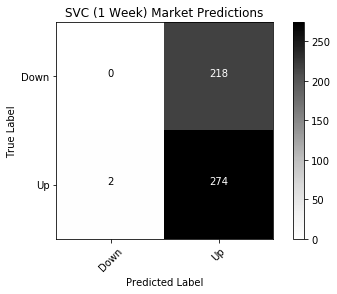

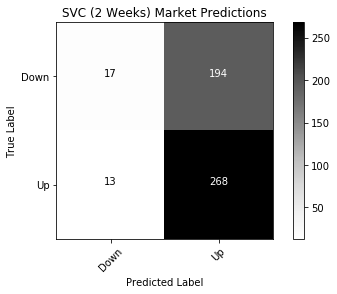

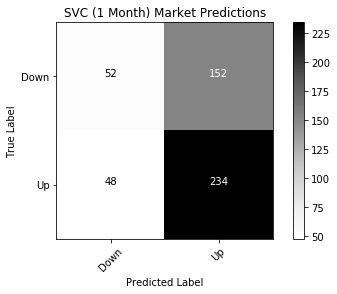

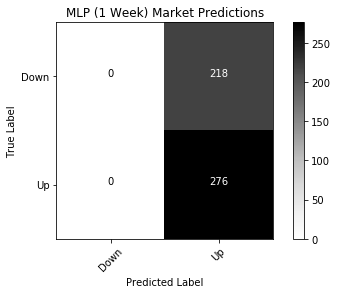

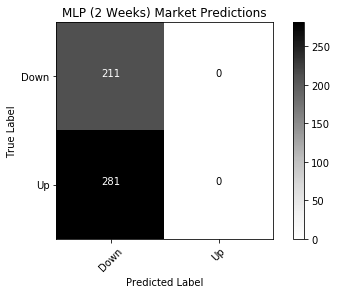

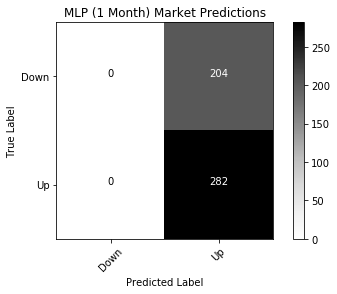

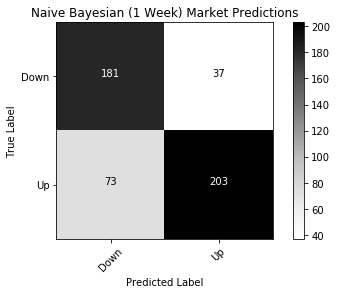

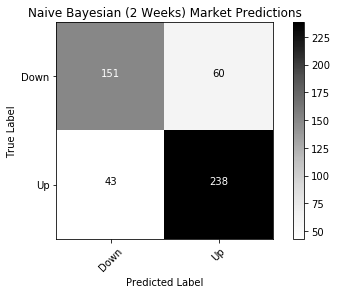

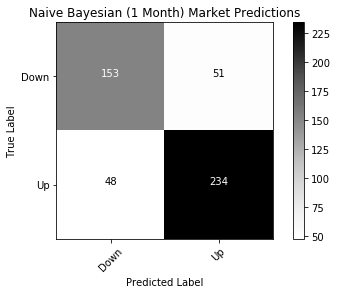

In [37]:
def plot_confusion_matrix(_classifier, title):
    """
    generates a confusion matrix for the given classifier
    and the test set and visually renders a table with the
    amount of predicted classes for each class.
    """    
    y_test = _classifier.dataset.y_test
    X_test = _classifier.dataset.X_test
    classifier = _classifier.instance
    
    plt.figure()
    
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    classes = ["Down","Up"]
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greys)
    plt.title(title+" Market Predictions")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

for classifier in classifiers:
    plot_confusion_matrix(classifier, classifier.name)

### ROC-Curves

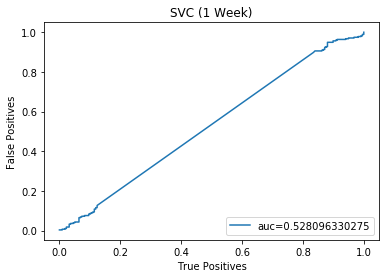

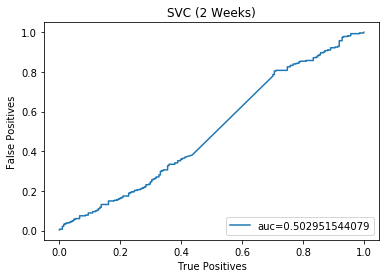

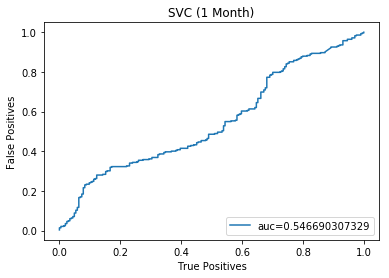

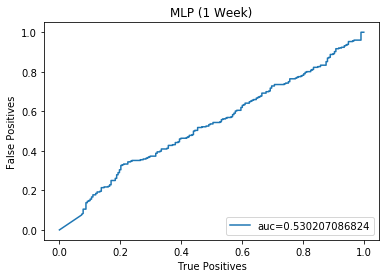

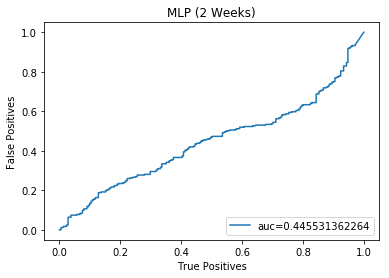

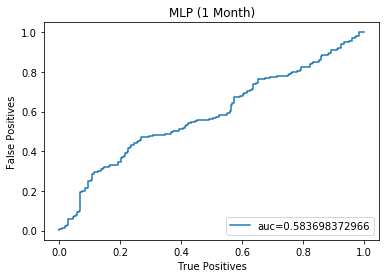

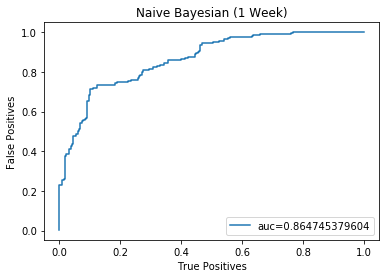

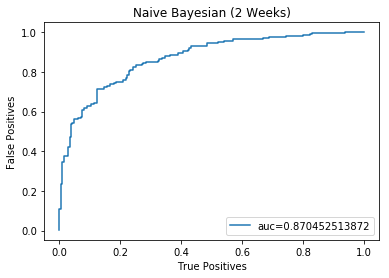

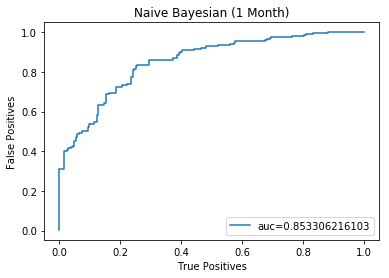

In [34]:
def plot_roc(classifier):
    y_pred = classifier.instance.predict(classifier.dataset.X_test)
    y_pred_proba = classifier.instance.predict_proba(classifier.dataset.X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(classifier.dataset.y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(classifier.dataset.y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.title(classifier.name)
    plt.legend(loc=4)
    plt.ylabel('False Positives')
    plt.xlabel('True Positives')
    plt.show()
    
for classifier in classifiers:
    plot_roc(classifier)